<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# data cleaning

## goals

- Examine data for potential issues
- Identify and fill in missing values
- Identify and correct incorrect values
- Remove low variance columns
- Identify potential outliers
- Correct incorrect data types
- Remove special characters and clean categorical variables
- Identify and remove duplicate records

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/vehicles_messy.csv', low_memory=False)

data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
data.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

## 1. null values

let's get null values...

In [6]:
data.isnull()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37839,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37840,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37841,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False


if we don't want to focus on individual values, can compute per-column total null values...

In [7]:
data.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

let's create a filter for columns that have at least one null value...

In [8]:
data.isnull().sum() > 0

barrels08     False
barrelsA08    False
charge120     False
charge240     False
city08        False
              ...  
modifiedOn    False
startStop      True
phevCity      False
phevHwy       False
phevComb      False
Length: 83, dtype: bool

let's extract only those columns with null values and total nulls...

In [9]:
null_cols = data.isnull().sum()

null_cols[null_cols > 0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

but what does it mean? are those nulls too much or acceptable?

In [10]:
null_cols[null_cols > 0] / len(data) * 100

cylinders      0.325027
displ          0.317100
drive          3.141928
eng_dscr      40.702376
trany          0.029067
guzzler       93.972465
trans_dscr    60.238353
tCharger      86.296012
sCharger      98.240097
atvType       91.882250
fuelType2     96.279365
rangeA        96.292577
evMotor       98.514917
mfrCode       81.436461
c240Dscr      99.902228
c240bDscr     99.904870
startStop     83.780356
dtype: float64

---

**pro tip: missingno**

missingno is a null (or missing) values visual analyzer...

https://github.com/ResidentMario/missingno

---

In [11]:
!pip install missingno

In [12]:
import missingno

from IPython.display import set_matplotlib_formats

In [13]:
%matplotlib inline
set_matplotlib_formats('svg')

In [14]:
# it is necessary to sample data since otherwise the plot would be over-populated 
sample_data = data.sample(512, random_state=42)

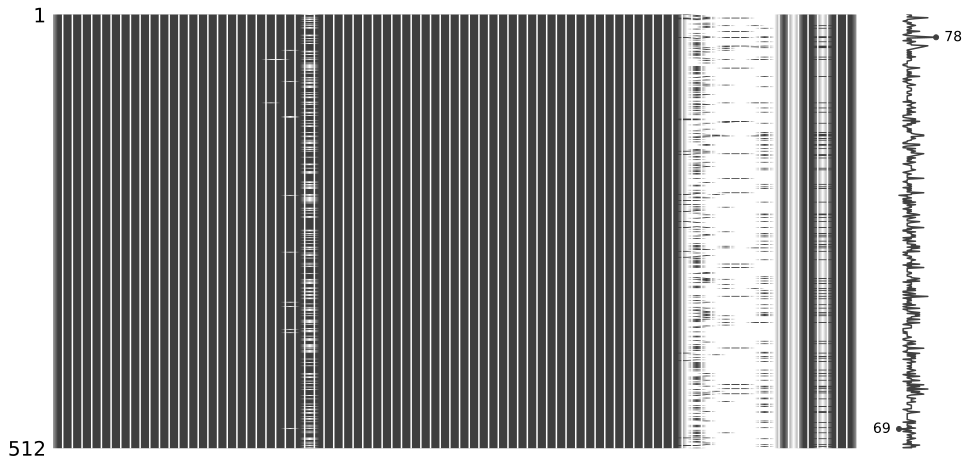

In [15]:
missingno.matrix(sample_data, figsize=(16, 8));

summary:

- each column represents a dataframe column
- null values are represented over bars as empty (blank) slots

other missingno plot type (bar):

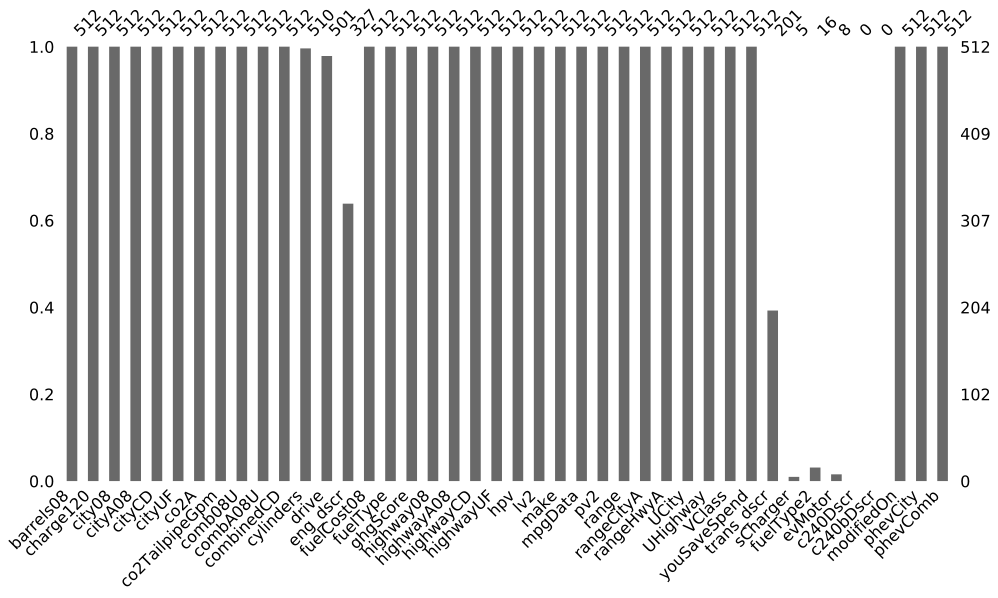

In [16]:
missingno.bar(sample_data.iloc[:, ::2], figsize=(16, 8));

summary:

- each column represents a dataframe column
- the smaller the bar the more null values in the column

there is also a heatmap visualization to see how null values correlates among columns...

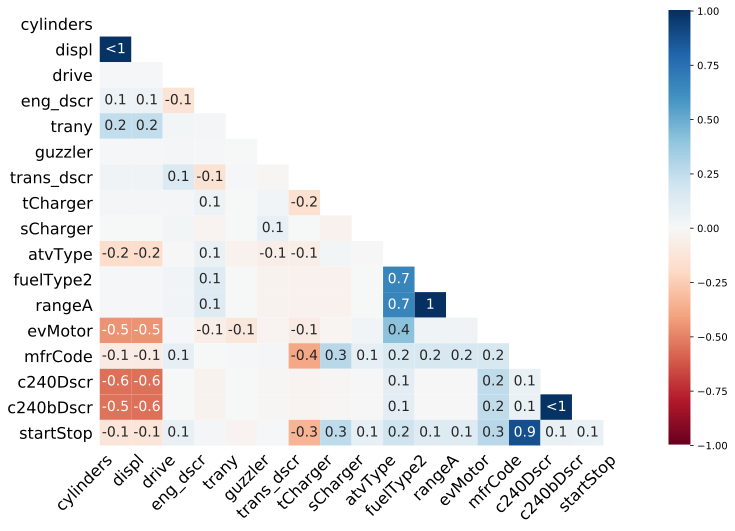

In [17]:
missingno.heatmap(data, figsize=(12,8))

last missingno functionality is a clustering columns with simmilar null behavior...

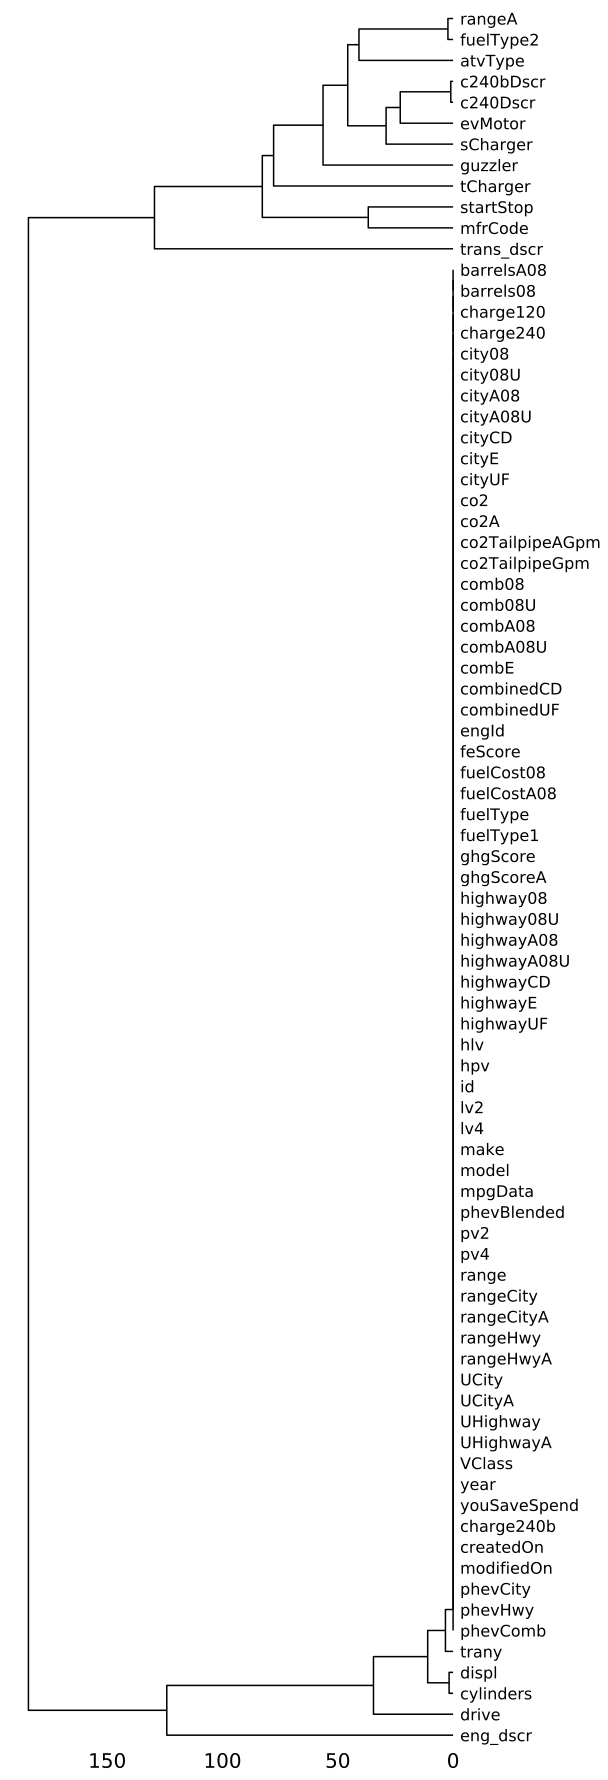

In [18]:
missingno.dendrogram(data, figsize=(8, 32))

let's now compute how many columns exists and how many null values they have...

In [19]:
len(sample_data.columns)

83

In [20]:
data.columns[0]

'barrels08'

In [21]:
data.iloc[:,0].isnull().sum()

0

In [22]:
data.columns[78]

'modifiedOn'

In [23]:
data.iloc[:,78].isnull().sum()

0

In [24]:
data.columns[76]

'c240bDscr'

In [25]:
data.iloc[:,76].isnull().sum()

37807

but what to do with null values?

### drop null values

for example, can drop columns with null % over a certain threshold...

In [26]:
threshold = 40

In [27]:
null_cols = null_cols[null_cols > 0] / len(data) * 100
null_filter = null_cols > threshold

drop_cols = list(null_cols[null_filter].index)

drop_cols

['eng_dscr',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'startStop']

once we have a list of columns to drop, there are different ways of getting rid of missing values...

#### select only columns not in drop cols

In [28]:
remain_columns = data.columns.difference(drop_cols)

In [29]:
remain_columns

Index(['UCity', 'UCityA', 'UHighway', 'UHighwayA', 'VClass', 'barrels08',
       'barrelsA08', 'charge120', 'charge240', 'charge240b', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'createdOn',
       'cylinders', 'displ', 'drive', 'engId', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'modifiedOn', 'mpgData', 'phevBlended', 'phevCity', 'phevComb',
       'phevHwy', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'trany', 'year', 'youSaveSpend'],
      dtype='object')

In [30]:
len(remain_columns)

70

In [31]:
# first approach, load data again using only valid columns...

data = pd.read_csv('data/vehicles_messy.csv', 
                   low_memory=False, 
                   usecols=remain_columns)

len(data.columns)

70

In [32]:
# second approach, load and select only needed columns

data = pd.read_csv('data/vehicles_messy.csv', 
                   low_memory=False)

data_without_nulls = data[remain_columns]

len(data_without_nulls.columns)

70

In [33]:
# third approach, drop columns

data = pd.read_csv('data/vehicles_messy.csv', 
                   low_memory=False)

data_without_nulls = data.drop(drop_cols, 
                     axis=1)

len(data_without_nulls.columns)

70

In [34]:
# third approach, same but inplace

data = pd.read_csv('data/vehicles_messy.csv', 
                   low_memory=False)

data.drop(drop_cols, 
          axis=1, 
          inplace=True)

len(data.columns)

70

In [35]:
# fourth approach, row based...

data = pd.read_csv('data/vehicles_messy.csv', 
                   low_memory=False)

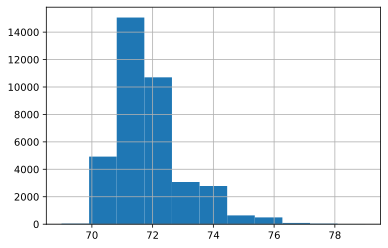

In [36]:
(len(data.columns) - data.isnull().sum(axis=1)).hist(bins=11);

In [37]:
data.shape

(37843, 83)

In [38]:
data.dropna(thresh=72).shape

(17816, 83)

### fill null values

Techniques to fill null values:

- 0s
- Mean, Median, Mode
- predictive methods

In [39]:
null_displ = data.loc[data['displ'].isnull(), ['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ
7138,2000,Nissan,Altra EV,NaN,NaN,Electricity,NaN,NaN
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8144,2001,Ford,Th!nk,NaN,NaN,Electricity,NaN,NaN
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Electricity,NaN,NaN
...,...,...,...,...,...,...,...,...
30969,2017,Kia,Soul Electric,Automatic (A1),Front-Wheel Drive,Electricity,NaN,NaN
30972,2016,Tesla,Model S (60 kW-hr battery pack),Automatic (A1),Rear-Wheel Drive,Electricity,NaN,NaN
30973,2016,Tesla,Model S AWD - 60D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN
30974,2016,Tesla,Model S AWD - P100D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN


In [40]:
# as expected electric cars do not have cylinders nor displacement
data[['displ', 'cylinders']] = data[['displ', 'cylinders']].fillna(0)

In [41]:
null_displ = data[data['displ'].isnull()]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ


In [42]:
null_displ = data[data['displ'] == 0]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ
7138,2000,Nissan,Altra EV,NaN,NaN,Electricity,0.0,0.0
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,0.0,0.0
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,0.0,0.0
8144,2001,Ford,Th!nk,NaN,NaN,Electricity,0.0,0.0
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Electricity,0.0,0.0
...,...,...,...,...,...,...,...,...
30969,2017,Kia,Soul Electric,Automatic (A1),Front-Wheel Drive,Electricity,0.0,0.0
30972,2016,Tesla,Model S (60 kW-hr battery pack),Automatic (A1),Rear-Wheel Drive,Electricity,0.0,0.0
30973,2016,Tesla,Model S AWD - 60D,Automatic (A1),All-Wheel Drive,Electricity,0.0,0.0
30974,2016,Tesla,Model S AWD - P100D,Automatic (A1),All-Wheel Drive,Electricity,0.0,0.0


## incorrect Values

In [61]:
test = data[(data['cylinders']==0) & (data['displ']!=0)]
test[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]

,year,make,model,trany,drive,fuelType,cylinders,displ
21506,1986,Mazda,RX-7,Manual 5-spd,Rear-Wheel Drive,Regular,0.0,1.3


To fill this cylinders value, we could ask an expert or fill with similar values encountered on the dataset. If no relation is found, just drop this record

In [62]:
# example on how to fill a value: loc[condition, column]
data.loc[(data['cylinders']==0) & (data['displ']!=0), 'cylinders'] = 4

In [63]:
data[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']].iloc[21506]

year                     1986
make                    Mazda
model                    RX-7
trany            Manual 5-spd
drive        Rear-Wheel Drive
fuelType              Regular
cylinders                   4
displ                     1.3
Name: 21506, dtype: object

## 2. low variance columns

In [76]:
# data[[x for x in data.columns if x not in data._get_numeric_data().columns]]
# data.drop(data._get_numeric_data().columns, axis=1)
data._get_numeric_data()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-1250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-8500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,500,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-8500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-4000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-750,0.0,0,0,0
37839,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-500,0.0,0,0,0
37840,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1250,0.0,0,0,0
37841,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1250,0.0,0,0,0


In [46]:
data['phevBlended']

0        False
1        False
2        False
3        False
4        False
         ...  
37838    False
37839    False
37840    False
37841    False
37842    False
Name: phevBlended, Length: 37843, dtype: bool

In [79]:
data._get_numeric_data().columns.difference(data.select_dtypes('number').columns)

Index(['phevBlended'], dtype='object')

In [91]:
data['barrelsA08'].min()

0.0

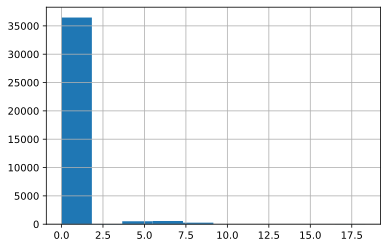

In [90]:
data['barrelsA08'].hist()

In [48]:
import numpy as np

low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    maximum = max(data[col])
    
    ten_perc = np.percentile(data[col], 10)
    ninety_perc = np.percentile(data[col], 90)
    
    if ten_perc == maximum or ninety_perc == minimum:
        low_variance.append(col)

low_variance

['barrelsA08',
 'charge120',
 'charge240',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2A',
 'co2TailpipeAGpm',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'fuelCostA08',
 'ghgScoreA',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'phevBlended',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [49]:
data.drop(low_variance, axis=1, inplace=True)

## 3. outliers

A common method for identifying outliers is one that leverages the interquartile range (IQR). Once the IQR is calculated, it is multiplied by a constant (typically 1.5) and lower and upper bounds are established at:

- 25th Percentile - (IQR x 1.5)
- 75th Percentile + (IQR x 1.5)

Any values outside this range are potential outliers and should be investigated.

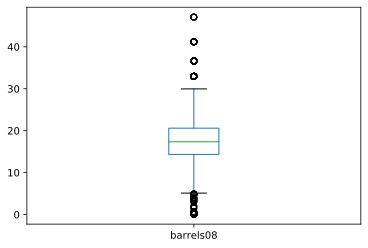

In [120]:
data['barrels08'].plot(kind='box')

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
co2,37843.0,61.503713,153.387715,-1.00,-1.00000,-1.000000,-1.000000,847.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000
comb08U,37843.0,4.549751,10.389994,0.00,0.00000,0.000000,0.000000,124.360100
cylinders,37843.0,5.719446,1.778959,0.00,4.00000,6.000000,6.000000,16.000000
displ,37843.0,3.307661,1.371985,0.00,2.20000,3.000000,4.300000,8.400000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000


In [123]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
co2,37843.0,61.503713,153.387715,-1.00,-1.00000,-1.000000,-1.000000,847.000000,0.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429,167.437500
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000,6.000000
comb08U,37843.0,4.549751,10.389994,0.00,0.00000,0.000000,0.000000,124.360100,0.000000
cylinders,37843.0,5.719446,1.778959,0.00,4.00000,6.000000,6.000000,16.000000,2.000000
displ,37843.0,3.307661,1.371985,0.00,2.20000,3.000000,4.300000,8.400000,2.100000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000,4505.000000


In [157]:
outliers = pd.DataFrame(columns=data.columns)

In [158]:
for col in stats.index:
    
    iqr = stats.loc[col, 'IQR']
    q_25 = stats.loc[col, '25%']
    q_75 = stats.loc[col, '75%']
    
    lower = q_25 - 1.5 * iqr
    upper = q_75 + 1.5 * iqr
    
    filter_lower = data[col] < lower
    filter_upper = data[col] > upper
    
    results = data[filter_upper | filter_lower].copy()
    results['outlier_col'] = col
    outliers = outliers.append(results)

In [159]:
outliers

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,drive,...,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop,outlier_col
47,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,5.9,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
58,32.961000,10,0.0,-1,888.700000,10,0.0,8.0,5.2,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
69,32.961000,10,0.0,-1,888.700000,10,0.0,8.0,5.2,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
80,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,5.9,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
275,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,7.4,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,41.201250,7,0.0,-1,1110.875000,8,0.0,8.0,6.0,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37615,27.467500,11,0.0,-1,740.583333,12,0.0,12.0,6.0,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37672,29.964545,9,0.0,-1,807.909091,11,0.0,8.0,6.8,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37673,29.964545,9,0.0,-1,807.909091,11,0.0,8.0,6.8,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend


In [149]:
for col in stats.index:
    iqr = stats.loc[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.loc[col,'25%'] - cutoff
    upper = stats.loc[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    
outliers

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,drive,...,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop,Outlier
47,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,5.9,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
58,32.961000,10,0.0,-1,888.700000,10,0.0,8.0,5.2,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
69,32.961000,10,0.0,-1,888.700000,10,0.0,8.0,5.2,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
80,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,5.9,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
275,32.961000,9,0.0,-1,888.700000,10,0.0,8.0,7.4,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,barrels08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,41.201250,7,0.0,-1,1110.875000,8,0.0,8.0,6.0,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37615,27.467500,11,0.0,-1,740.583333,12,0.0,12.0,6.0,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37672,29.964545,9,0.0,-1,807.909091,11,0.0,8.0,6.8,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend
37673,29.964545,9,0.0,-1,807.909091,11,0.0,8.0,6.8,Rear-Wheel Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,youSaveSpend


to remove outliers...

In [165]:
cutoff = 1.5 * (data['barrels08'].quantile(.75) - data['barrels08'].quantile(0.25))

In [178]:
data[data['barrels08'].between(data['barrels08'].quantile(0.25) - cutoff, data['barrels08'].quantile(0.75) + cutoff)]['barrels08']

0        15.695714
1        29.964545
2        12.207778
3        29.964545
4        17.347895
           ...    
37838    14.982273
37839    14.330870
37840    15.695714
37841    15.695714
37842    18.311667
Name: barrels08, Length: 37411, dtype: float64

In [67]:
cutoff = 1.5 * (data['barrels08'].quantile(.75) - data['barrels08'].quantile(.25))
data['barrels08'].between(data['barrels08'].quantile(.25) - cutoff, data['barrels08'].quantile(.25) + cutoff)

0         True
1        False
2         True
3        False
4         True
         ...  
37838     True
37839     True
37840     True
37841     True
37842     True
Name: barrels08, Length: 36958, dtype: bool

### pyod

Out of scope at this moment, to investigate for those with finished labs

https://pyod.readthedocs.io/en/latest/

## 4. data type corrections

how to change data types...

In [53]:
data.dtypes

barrels08         float64
city08              int64
city08U           float64
co2                 int64
co2TailpipeGpm    float64
comb08              int64
comb08U           float64
cylinders         float64
displ             float64
drive              object
engId               int64
eng_dscr           object
feScore             int64
fuelCost08          int64
fuelType           object
fuelType1          object
ghgScore            int64
highway08           int64
highway08U        float64
hlv                 int64
hpv                 int64
id                  int64
lv2                 int64
lv4                 int64
make               object
model              object
mpgData            object
pv2                 int64
pv4                 int64
trany              object
UCity             float64
UHighway          float64
VClass             object
year                int64
youSaveSpend        int64
guzzler            object
trans_dscr         object
tCharger           object
sCharger    

In [195]:
data['make']

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
37838        Subaru
37839        Subaru
37840        Subaru
37841        Subaru
37842        Subaru
Name: make, Length: 37843, dtype: object

In [54]:
data['year'].value_counts().sort_index()

1984    1964
1985    1701
1986    1210
1987    1247
1988    1130
1989    1153
1990    1078
1991    1132
1992    1121
1993    1093
1994     982
1995     967
1996     773
1997     762
1998     812
1999     852
2000     840
2001     911
2002     975
2003    1044
2004    1122
2005    1166
2006    1104
2007    1126
2008    1187
2009    1184
2010    1109
2011    1130
2012    1153
2013    1185
2014    1226
2015    1283
2016    1258
2017     863
Name: year, dtype: int64

In [189]:
data.loc[:, 'year'] = data['year'].astype('object')

In [185]:
data['year']

0        1985
1        1985
2        1985
3        1985
4        1993
         ... 
37838    1993
37839    1993
37840    1993
37841    1993
37842    1993
Name: year, Length: 37843, dtype: int64

## 5. cleaning text and removing special characters

In [205]:
data['make'].astype('category')

0          3
1         38
2         31
3         31
4        116
        ... 
37838    116
37839    116
37840    116
37841    116
37842    116
Length: 37843, dtype: int16

In [202]:
data['make'].str[:3].str.upper()

0        ALF
1        FER
2        DOD
3        DOD
4        SUB
        ... 
37838    SUB
37839    SUB
37840    SUB
37841    SUB
37842    SUB
Name: make, Length: 37843, dtype: object

In [206]:
print(set(data['trany']))
print(f'Initial records to process: {len(set(data["trany"]))}')

{nan, 'Automatic (A1)', 'Auto(AM7)', 'Auto(L3)', 'Automatic (AV)', 'Auto(AM-S7)', 'Manual(M7)', 'Auto (AV)', 'Automatic 5-spd', 'Auto(AM6)', 'Manual 4-spd Doubled', 'Auto (AV-S8)', 'Automatic (variable gear ratios)', 'Auto(AV-S8)', 'Automatic 4-spd', 'Auto(AV-S7)', 'Automatic 6spd', 'Automatic (AV-S6)', 'Auto(AM-S8)', 'Manual 6-spd', 'Automatic (AM5)', 'Automatic (A6)', 'Automatic 6-spd', 'Automatic (AM6)', 'Auto(AM-S9)', 'Manual 5-spd', 'Automatic 7-spd', 'Manual 3-spd', 'Automatic (S4)', 'Automatic 9-spd', 'Auto(AM-S6)', 'Auto (AV-S6)', 'Automatic (S9)', 'Automatic (S5)', 'Auto(AM5)', 'Manual 5 spd', 'Automatic (S8)', 'Automatic (S7)', 'Auto(A1)', 'Automatic (S6)', 'Automatic 3-spd', 'Auto(L4)', 'Automatic 8-spd', 'Auto(AV-S6)', 'Manual 4-spd', 'Manual 7-spd', 'Auto(AM8)'}
Initial records to process: 47


In [207]:
data['trany'] = data['trany'].str.replace('-', '')

print(set(data['trany']))
print(f'Unique values: {len(set(data["trany"]))}')

{nan, 'Automatic (A1)', 'Auto(AMS8)', 'Auto(AM7)', 'Auto(L3)', 'Automatic (AV)', 'Auto(AM8)', 'Auto (AVS6)', 'Manual(M7)', 'Manual 4spd Doubled', 'Auto (AV)', 'Auto(AM6)', 'Manual 5spd', 'Automatic 7spd', 'Automatic (AVS6)', 'Automatic 8spd', 'Automatic (variable gear ratios)', 'Automatic 6spd', 'Automatic 3spd', 'Automatic 5spd', 'Automatic (AM5)', 'Automatic (A6)', 'Automatic (AM6)', 'Automatic 4spd', 'Automatic (S4)', 'Automatic (S9)', 'Manual 7spd', 'Automatic (S5)', 'Auto(AM5)', 'Manual 4spd', 'Manual 5 spd', 'Automatic (S8)', 'Automatic (S7)', 'Auto(AVS7)', 'Auto(AVS6)', 'Auto (AVS8)', 'Auto(AVS8)', 'Auto(AMS6)', 'Automatic 9spd', 'Auto(A1)', 'Automatic (S6)', 'Auto(AMS7)', 'Auto(L4)', 'Manual 6spd', 'Auto(AMS9)', 'Manual 3spd'}
Unique values: 46


In [209]:
data['trany'] = data['trany'].str.replace('Automatic', 'Auto') \
                             .str.replace('Auto\(', 'Auto ')

In [208]:
data['trany'] = data['trany'].str.replace('Automatic', 'Auto')
data['trany'] = data['trany'].str.replace('Auto\(', 'Auto ')
data['trany'] = data['trany'].str.replace('Manual\(', 'Manual ')
data['trany'] = data['trany'].str.replace('\(', '')
data['trany'] = data['trany'].str.replace('\)', '')

print(set(data['trany']))
print(f'Unique values: {len(set(data["trany"]))}')

{nan, 'Auto L4', 'Auto S8', 'Manual 4spd Doubled', 'Auto 5spd', 'Manual 5spd', 'Auto S6', 'Auto A6', 'Auto AMS6', 'Auto 3spd', 'Auto 6spd', 'Auto variable gear ratios', 'Auto S5', 'Auto AVS7', 'Auto 8spd', 'Auto AM7', 'Auto S4', 'Auto S9', 'Auto AVS6', 'Auto AM6', 'Auto 7spd', 'Manual M7', 'Auto AV', 'Manual 7spd', 'Auto L3', 'Auto AM8', 'Auto S7', 'Manual 4spd', 'Auto AMS9', 'Manual 5 spd', 'Auto A1', 'Auto AMS7', 'Auto 4spd', 'Auto 9spd', 'Auto AM5', 'Manual 6spd', 'Auto AMS8', 'Auto AVS8', 'Manual 3spd'}
Unique values: 39


## 6. drop duplicates

In [211]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print(f'Number of duplicate records dropped: {before - after}')

Number of duplicate records dropped: 0


In [212]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'trany', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

# data = data[select_columns].drop_duplicates()
# after = len(data)
# print(f'Number of duplicate records dropped: {before - after}')

In [223]:
data.drop_duplicates(subset=select_columns, keep='first', inplace=True)

In [224]:
data.shape

(36958, 50)

In [217]:
data[select_columns].shape

(37843, 15)

In [218]:
data[select_columns].drop_duplicates().shape

(36958, 15)

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>